# 10 class landmark recognition

The problem comes from a famous Kaggle competition, the Google Landmark Recognition Challenge. Training set contains over 1.2 million images spread across 14,951 classes of landmarks, varying from one to thousands of images per class. This problem of extreme classification is something that is very prevalent in the data science community today with the advancement of deep learning.


In [2]:
import numpy as np
import pandas as pd

from keras.applications import MobileNet
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Model

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train_data_dir = '/content/gdrive/My Drive/Colab Notebooks/Google Landmark Recognition/images/train'
validation_data_dir = '/content/gdrive/My Drive/Colab Notebooks/Google Landmark Recognition/images/validation'

batch_size = 16
img_height, img_width = 96, 96

We needed to start with general data preprocessing before we could implement CNNs from Keras for our image classification purposes.

In [4]:
# Pixel values rescaling from [0, 255] to [0, 1] interval
train_generator = ImageDataGenerator(rescale=1/255, rotation_range=90, zoom_range=0.2, horizontal_flip=True)

validation_generator = ImageDataGenerator(rescale=1/255)

# Retrieve images and their classes for train and validation sets
train_flow = train_generator.flow_from_directory(directory=train_data_dir, 
                                                 batch_size=batch_size, target_size=(img_height,img_width))

validation_flow = validation_generator.flow_from_directory(
    directory=validation_data_dir, batch_size=batch_size, 
    target_size=(img_height,img_width))

Found 9917 images belonging to 10 classes.
Found 1969 images belonging to 10 classes.


In [0]:
nb_train_samples = 9917
nb_validation_samples = 1969
n_classes =  10
epochs = 10

Basic CNN: Model architecture definition

We build a sequential model and add convolutional layers and max pooling layers to it. We also add dropout layers in between, dropout randomly switches off some neurons in the network which forces the data to find new paths. Therefore, this reduces overfitting. We add dense layers at the end which are used for class prediction.

Max-pooling: A technique used to reduce the dimensions of an image by taking the maximum pixel value of a grid. This also helps reduce overfitting and makes the model more generic. The example below show how 2 x 2 max pooling works

<img src=https://www.learnopencv.com/wp-content/uploads/2017/11/cnn-schema1.jpg width="500">

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer="adam",
            metrics=["categorical_accuracy"])

model.summary()


# Model saving callback
checkpointer = ModelCheckpoint(filepath='basic_cnn.h5py', monitor='val_categorical_accuracy', save_best_only=True)

# Early stopping
early_stopping = EarlyStopping(monitor='val_categorical_accuracy', verbose=1, patience=3)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [9]:
history = model.fit_generator(generator=train_flow, 
                    samples_per_epoch=nb_train_samples,
                    validation_data=validation_flow,
                    nb_val_samples=nb_validation_samples,
                    callbacks=[checkpointer, early_stopping],
                    verbose=1,
                    epochs=epochs)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., validation_data=<keras_pre..., callbacks=[<keras.ca..., verbose=1, epochs=10, steps_per_epoch=619, validation_steps=1969)`
  import sys


Epoch 1/10
619/619 [==============================] - 4613s 7s/step - loss: 2.1198 - categorical_accuracy: 0.2303 - val_loss: 2.1402 - val_categorical_accuracy: 0.2836
Epoch 2/10
  3/619 [..............................] - ETA: 37s - loss: 1.9689 - categorical_accuracy: 0.3221 

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_categorical_accuracy,loss,categorical_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


619/619 [==============================] - 1061s 2s/step - loss: 1.8396 - categorical_accuracy: 0.3696 - val_loss: 1.6696 - val_categorical_accuracy: 0.4218
Epoch 3/10
619/619 [==============================] - 1061s 2s/step - loss: 1.6499 - categorical_accuracy: 0.4404 - val_loss: 1.5180 - val_categorical_accuracy: 0.4873
Epoch 4/10
619/619 [==============================] - 1056s 2s/step - loss: 1.4583 - categorical_accuracy: 0.5053 - val_loss: 1.4150 - val_categorical_accuracy: 0.5038
Epoch 5/10
619/619 [==============================] - 1058s 2s/step - loss: 1.3431 - categorical_accuracy: 0.5441 - val_loss: 1.2636 - val_categorical_accuracy: 0.5795
Epoch 6/10
619/619 [==============================] - 1063s 2s/step - loss: 1.2657 - categorical_accuracy: 0.5734 - val_loss: 1.3966 - val_categorical_accuracy: 0.5376
Epoch 7/10
619/619 [==============================] - 1056s 2s/step - loss: 1.1817 - categorical_accuracy: 0.6067 - val_loss: 1.1911 - val_categorical_accuracy: 0.6059
Epo

In [0]:
model.save('basic_cnn.h5py')
model_file = drive.CreateFile({'title' : 'basic_cnn.h5py'})
model_file.SetContentFile('basic_cnn.h5py')
model_file.Upload()

In [11]:
# download to google drive
drive.CreateFile({'id': model_file.get('id')})
'''
Loading models from Google Drive into Colab
file_obj = drive.CreateFile({'id': '16zbkEN4vqnPvIOvLMF1IaXKYCq5g3Yln'})
file_obj.GetContentFile('keras.h5')'''

"\nLoading models from Google Drive into Colab\nfile_obj = drive.CreateFile({'id': '16zbkEN4vqnPvIOvLMF1IaXKYCq5g3Yln'})\nfile_obj.GetContentFile('keras.h5')"

In [12]:
model.evaluate_generator(validation_flow, nb_validation_samples, workers=10)

[1.0654100376415028, 0.6498528659160696]

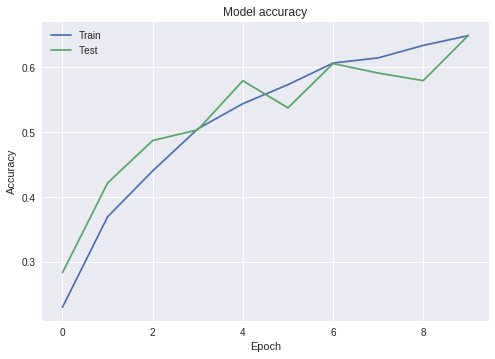

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Transfer Learning - predictions using weights from ImageNet (VGG16)**

Transfer learning is using pre-trained CNN architecture. When we train our own data on the top of the pre-trained parameters, we can easily reach to the target accuracy. 

The architecture of VGG16: the input layer takes an image in the size of (224 x 224 x 3), and the output layer is a softmax prediction on 1000 classes. From the input layer to the last max pooling layer (labeled by 7 x 7 x 512) is regarded as the feature extraction part of the model, while the rest of the network is regarded as the classification part of the model. Before proceeding with any model training, VGG16 architecture trained on Imagenet dataset is picked up and is used to predict on the images that we had.

![alt text](https://s3.ap-south-1.amazonaws.com/techleer/309.jpg)

<img src=http://lh3.ggpht.com/-Fri9BOfQIe8/Sg1CCY2Uc7I/AAAAAAAACAY/5ya_xz8N2i0/s1600/ width="300">

In [0]:
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [25]:
model = VGG16(weights = 'imagenet', include_top = True)

img_path = r'/content/gdrive/My Drive/Colab Notebooks/Google Landmark Recognition/images/train/2061/0aa810ea624bb7b0.jpg'
img = image.load_img(img_path, target_size= (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

preds = model.predict(x)
print ('Predicted:', decode_predictions(preds, top = 10)[0])

40960/35363 [==================================] - 0s 2us/step
Predicted: [('n03877845', 'palace', 0.23293868), ('n03447447', 'gondola', 0.093717426), ('n03781244', 'monastery', 0.049728256), ('n02667093', 'abaya', 0.037438527), ('n02097130', 'giant_schnauzer', 0.032675724), ('n04485082', 'tripod', 0.018832762), ('n04486054', 'triumphal_arch', 0.018675718), ('n02098286', 'West_Highland_white_terrier', 0.018213551), ('n02111277', 'Newfoundland', 0.016907277), ('n02980441', 'castle', 0.01578292)]


<b> Observation: Model predicted image class as "palace", which is true. Imagenet weights are successfully able to capture the generic features from landmarks. </b>

In [26]:
h,w = 96, 96
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(h,w,3))

58892288/58889256 [==============================] - 2s 0us/step


In [27]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0         
__________

In [28]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(50,activation="relu"))
top_model.add(Dense(10,activation="sigmoid"))
top_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                230450    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 230,960
Trainable params: 230,960
Non-trainable params: 0
_________________________________________________________________


In [30]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(top_model)

transfer_model.layers[0].trainable = False

transfer_model.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["categorical_accuracy"])

transfer_model.summary()

# Model saving callback
checkpointer = ModelCheckpoint(filepath='transfer_learned_cnn.h5py', monitor='val_categorical_accuracy', save_best_only=True)

# Early stopping
early_stopping = EarlyStopping(monitor='val_categorical_accuracy', verbose=1, patience=3)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
sequential_2 (Sequential)    (None, 10)                230960    
Total params: 14,945,648
Trainable params: 230,960
Non-trainable params: 14,714,688
_________________________________________________________________


In [31]:
train_generator = ImageDataGenerator(rescale=1/255,
                                     rotation_range=90,
                                     zoom_range=0.2,
                                     horizontal_flip=True)
validation_generator = ImageDataGenerator(rescale=1/255)

train_flow = train_generator.flow_from_directory(
    directory=train_data_dir, batch_size=batch_size, 
    target_size=(h,w))

validation_flow = validation_generator.flow_from_directory(
    directory=validation_data_dir, batch_size=batch_size, 
    target_size=(h,w))

transfer_history = transfer_model.fit_generator(generator=train_flow, 
                    samples_per_epoch=nb_train_samples,
                    validation_data=validation_flow,
                    nb_val_samples=nb_validation_samples,
                    callbacks=[checkpointer, early_stopping],
                    epochs=10)

Found 9917 images belonging to 10 classes.
Found 1969 images belonging to 10 classes.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., validation_data=<keras_pre..., callbacks=[<keras.ca..., epochs=10, steps_per_epoch=619, validation_steps=1969)`


Epoch 1/10
619/619 [==============================] - 1124s 2s/step - loss: 1.4244 - categorical_accuracy: 0.5303 - val_loss: 1.1326 - val_categorical_accuracy: 0.6222
Epoch 2/10
619/619 [==============================] - 1107s 2s/step - loss: 1.0810 - categorical_accuracy: 0.6428 - val_loss: 1.0719 - val_categorical_accuracy: 0.6594
Epoch 3/10
619/619 [==============================] - 1107s 2s/step - loss: 0.9864 - categorical_accuracy: 0.6769 - val_loss: 1.0639 - val_categorical_accuracy: 0.6594
Epoch 4/10
619/619 [==============================] - 1099s 2s/step - loss: 0.9421 - categorical_accuracy: 0.6900 - val_loss: 0.9675 - val_categorical_accuracy: 0.6910
Epoch 5/10
619/619 [==============================] - 1097s 2s/step - loss: 0.8915 - categorical_accuracy: 0.7083 - val_loss: 0.8938 - val_categorical_accuracy: 0.7077
Epoch 6/10
619/619 [==============================] - 1092s 2s/step - loss: 0.8613 - categorical_accuracy: 0.7147 - val_loss: 0.9195 - val_categorical_accuracy:

In [0]:
transfer_model.save('transfer_learnd_cnn.h5py')
transfer_model_file = drive.CreateFile({'title' : 'transfer_learnd_cnn.h5py'})
transfer_model_file.SetContentFile('transfer_learnd_cnn.h5py')
transfer_model_file.Upload()

In [33]:
# download to google drive
drive.CreateFile({'id': transfer_model_file.get('id')})

GoogleDriveFile({'id': '1kIgeCB5IrUlvXGrSiF1_6FKbOxS_u7fS'})

In [34]:
transfer_model.evaluate_generator(validation_flow, nb_validation_samples, workers=10)

[0.9691881930173821, 0.6899309109518935]

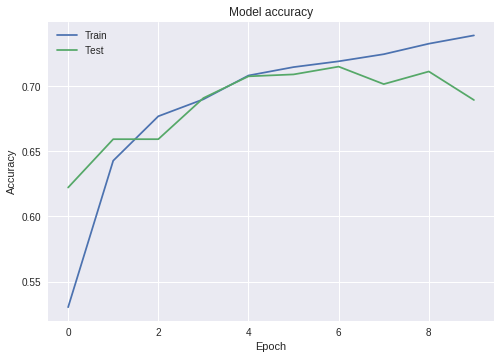

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(transfer_history.history['categorical_accuracy'])
plt.plot(transfer_history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Test data

Now i am checking my model on the test data to be sure it's working.


In [1]:
from keras.models import load_model
final_model = load_model('transfer_learnd_cnn.h5py')

Using TensorFlow backend.
/home/natalia/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:343: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [9]:
#load test data
test_data_dir = '../data sets/Ten categories landmark recognition/images/test/'

In [10]:
img_height, img_width = 96, 96
batch_size =16

#standarize images for predicting
test_generator = ImageDataGenerator(rescale=1/255)

test_flow = test_generator.flow_from_directory(directory=test_data_dir, 
                                                 batch_size=batch_size, target_size=(img_height,img_width))

Found 184 images belonging to 10 classes.


In [11]:
final_model.evaluate_generator(test_flow, test_flow.samples / batch_size, verbose=1)

12/11 [===============================] - 50s 4s/step


[0.9475284607514091, 0.6793478260869565]

### Referances:

    * https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis
    * https://towardsdatascience.com/google-landmark-recognition-using-transfer-learning-dde35cc760e1
    * https://github.com/anishagg/Google-Landmark-Recognition/blob/master/Scripts/Landmark_Recognition.ipynb
    * https://github.com/svetlana-topalova/Landmark-Recognition/blob/master/DL_Project_Landmark%20Recognition.ipynb
    * https://s3.ap-south-1.amazonaws.com/techleer/309.jpg
    * http://lh3.ggpht.com/-Fri9BOfQIe8/Sg1CCY2Uc7I/AAAAAAAACAY/5ya_xz8N2i0/s1600
    * https://www.learnopencv.com/wp-content/uploads/2017/11/cnn-schema1.jpg

